# #Aquiestamoslasfeministas 

### Introduction

In this project we are going to analize a Twitter hashtag made by Spanish feminists. We suspect that it is not a genuine and spontaneous one, but an attempt to pressure politically and spread hate against the trans community. The hashtag is #aquiestamoslasfeministas (Here we are the feminists). These feminists are called 'Trans Exclusionary Radical Feminists', so in advance we are going to denominate them TERFs.

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import re
from IPython.display import Image

pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)
pd.options.mode.chained_assignment = None

### General View

Previously we have collected the tweets of the hashtag into a .txt file with a program called [t-hoarder](https://github.com/congosto/t-hoarder).

We open the file with pandas into a dataframe and take a look at the data.

In [2]:
ht = pd.read_csv('aquiestamoslasfeministas_clean_ok.txt', sep="\t", on_bad_lines="skip")
ht.head(2)

,id tweet,date,author,text,app,id user,followers,following,stauses,location,urls,geolocation,name,description,url_media,type media,quoted,relation,replied_id,user replied,retweeted_id,user retweeted,quoted_id,user quoted,first HT,lang,created_at,verified,avatar,link
0,1394213858621939712,2021-05-17 08:51:01,@madredecabrones,"Que quede claro que no somos la derecha, ni bocs, ni HO... Que quede claro que somos mujeres, madres, hijas cansadas de que el patriarcado se disfrace con colorinchis para clavarnosla aún más profundo... Si no podéis venir, podéis ayudar por aquí...#Aquiestamoslasfeministas 💪💜",Twitter for Android,747827006780354561,1516,2489,19574,"Madrid, España",None,None,Madre de Cabrones,"Antirreligiosa, republicana, feminista (FEMINAZGUL 💜...not the fun kind), metalera, Slytherin y Hobbit. Equidistánfoba. A las cosas por su nombre.",None,None,None,reply,1394213854364774401,@madredecabrones,None,None,None,None,Aquiestamoslasfeministas,es,2016-06-28 16:20:27,False,https://pbs.twimg.com/profile_images/1332116114910883842/uGrU3-Cj_normal.jpg,https://twitter.com/madredecabrones/status/1394213858621939712
1,1394216517504544771,2021-05-17 09:01:35,@verketal,"RT @madredecabrones: Que quede claro que no somos la derecha, ni bocs, ni HO... Que quede claro que somos mujeres, madres, hijas cansadas de que el patriarcado se disfrace con colorinchis para clavarnosla aún más profundo... Si no podéis venir, podéis ayudar por aquí...#Aquiestamoslasfeministas 💪💜",Twitter for Android,483372414,668,1546,4745,NaN,None,None,Verolerolerola,"Ácrata, protestona y rara",None,None,None,RT,None,None,1394213858621939712,@madredecabrones,None,None,Aquiestamoslasfeministas,es,2012-02-04 23:14:18,False,https://pbs.twimg.com/profile_images/1364131403789701125/BaBq2b_r_normal.jpg,https://twitter.com/verketal/status/1394216517504544771


With t-hoarder we can get a .gdf file with the retweet data and with the program Gephi we make a graph with the purpose of observing how the users behave and what are the communities inside the hashtag.

In [3]:
Image(url="Imagenes/aquiestamoslasfeministas_small.png", width=600,height=600)

Then we can export the community data into a .csv file. We extract the 'Label' (same as author) and 'modularity_class' (communities) columns to add them to our main dataframe. We also change the 'Label' column to 'author' so we can merge later. To standardize the data, we make the 'author', 'text' and 'user retweeted' columns lowercase. Finally, we merge the 'modularity class' column into the dataframe, using the author as the reference.

In [4]:
ht_modularity = pd.read_csv('aquiestamoslasfeministas_modularidad.csv')
ht_modularity = ht_modularity[['Label', 'modularity_class']]
ht_modularity.columns=['author', 'modularity_class']
ht_modularity['author'] = ht_modularity['author'].str.lower()
ht['author'] = ht['author'].str.lower()
ht['text'] = ht['text'].str.lower()
ht['user retweeted'] = ht['user retweeted'].str.lower()
ht = ht.merge(ht_modularity, how="left", on="author")
ht.head(2)

,id tweet,date,author,text,app,id user,followers,following,stauses,location,urls,geolocation,name,description,url_media,type media,quoted,relation,replied_id,user replied,retweeted_id,user retweeted,quoted_id,user quoted,first HT,lang,created_at,verified,avatar,link,modularity_class
0,1394213858621939712,2021-05-17 08:51:01,@madredecabrones,"que quede claro que no somos la derecha, ni bocs, ni ho... que quede claro que somos mujeres, madres, hijas cansadas de que el patriarcado se disfrace con colorinchis para clavarnosla aún más profundo... si no podéis venir, podéis ayudar por aquí...#aquiestamoslasfeministas 💪💜",Twitter for Android,747827006780354561,1516,2489,19574,"Madrid, España",None,None,Madre de Cabrones,"Antirreligiosa, republicana, feminista (FEMINAZGUL 💜...not the fun kind), metalera, Slytherin y Hobbit. Equidistánfoba. A las cosas por su nombre.",None,None,None,reply,1394213854364774401,@madredecabrones,None,none,None,None,Aquiestamoslasfeministas,es,2016-06-28 16:20:27,False,https://pbs.twimg.com/profile_images/1332116114910883842/uGrU3-Cj_normal.jpg,https://twitter.com/madredecabrones/status/1394213858621939712,5.0
1,1394216517504544771,2021-05-17 09:01:35,@verketal,"rt @madredecabrones: que quede claro que no somos la derecha, ni bocs, ni ho... que quede claro que somos mujeres, madres, hijas cansadas de que el patriarcado se disfrace con colorinchis para clavarnosla aún más profundo... si no podéis venir, podéis ayudar por aquí...#aquiestamoslasfeministas 💪💜",Twitter for Android,483372414,668,1546,4745,NaN,None,None,Verolerolerola,"Ácrata, protestona y rara",None,None,None,RT,None,None,1394213858621939712,@madredecabrones,None,None,Aquiestamoslasfeministas,es,2012-02-04 23:14:18,False,https://pbs.twimg.com/profile_images/1364131403789701125/BaBq2b_r_normal.jpg,https://twitter.com/verketal/status/1394216517504544771,4.0


From the 'date' column we create another one without the minutes and seconds called 'date_calc'.

In [5]:
ht['date_calc'] = ht['date'].apply(lambda x: x.split(":")[0])
ht['date_calc'] = ht['date_calc'].apply(lambda x: x + ":00")

With this new column we can build a pivot table in order to count how many tweets there are by hour and community.

In [6]:
tweets_hour = pd.pivot_table(ht,index= "date_calc",columns= "modularity_class",aggfunc= ["count"],values=['id tweet'])
tweets_hour = tweets_hour.fillna(0)
tweets_hour.to_csv('distribucion_por_horas.csv')

tweets_hour = pd.read_csv('distribucion_por_horas.csv')
tweets_hour.columns = tweets_hour.iloc[1]
tweets_hour = tweets_hour[3:]
tweets_hour.to_csv('distribucion_por_horas.csv')

tweets_hour = pd.read_csv('distribucion_por_horas.csv')
tweets_hour = tweets_hour.drop(['Unnamed: 0'], axis=1)
tweets_hour.rename(columns={'modularity_class':'hour'}, inplace=True)
tweets_hour.head()

,hour,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0
0,2021-05-17 08:00,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,2021-05-17 09:00,0.0,0.0,2.0,1.0,5.0,4.0,0.0,3.0,0.0,0.0,0.0
2,2021-05-17 10:00,0.0,0.0,1.0,0.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0
3,2021-05-17 11:00,0.0,0.0,2.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
4,2021-05-17 12:00,0.0,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0


We represent the number of tweets per hour in a stacked bar graph to identify different peaks of activity and the importance of the different communities.

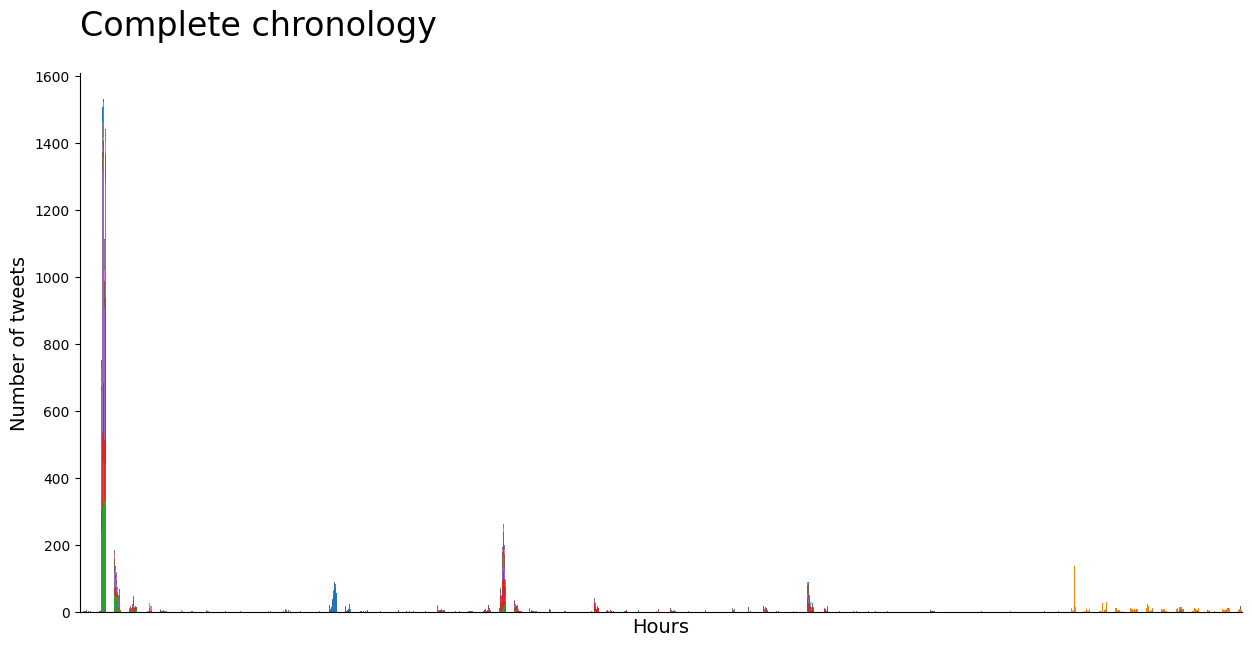

In [7]:
ax = tweets_hour.plot.bar(x='hour', stacked=True,figsize=(15,7),legend=None)
ax.spines[['top','right']].set_visible(False)
plt.text(-0.4,1720,'Complete chronology',fontsize=24)
plt.text(-0.55,1640,'',fontsize=14)
plt.xlabel('Hours',fontsize=14)
plt.tick_params(axis='x',which='both',bottom=False,top=False,labelbottom=False)
plt.ylabel('Number of tweets',fontsize=14)
plt.savefig('1. cronologia completa.jpg',bbox_inches='tight',dpi=200)

Manually we look for the most important users of each community on Twitter and we find that the first peak is made by TERFs, so we zoom into it. We take the whole days May 18 and 19.

In [8]:
viz_peak_terf = tweets_hour[(tweets_hour['hour'] > "2021-05-18 00:00")&(tweets_hour['hour'] < "2021-05-20 00:00")]
viz_peak_terf.head()

,hour,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0
16,2021-05-18 01:00,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
17,2021-05-18 04:00,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
18,2021-05-18 05:00,0.0,0.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
19,2021-05-18 06:00,0.0,0.0,2.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
20,2021-05-18 07:00,0.0,0.0,242.0,66.0,353.0,13.0,10.0,45.0,0.0,1.0,22.0


We drop the communities number 0, 1 and 8 because they are regular feminists. Then we rename the columns to identify them with type and the principal user of the community.

In [9]:
viz_peak_terf = viz_peak_terf.drop(['0.0','1.0','8.0'], axis=1)
viz_peak_terf.columns = ['time','2-TERFS @mabolicion','3-TERFS @maryreflektor','4-TERFS @EstherPedroche',
                     '5-TERFS @confluenciamf','6-TERFS','7-TERFS @Estacadebares','9-TERFS','10-TERFS']

We represent the peak.

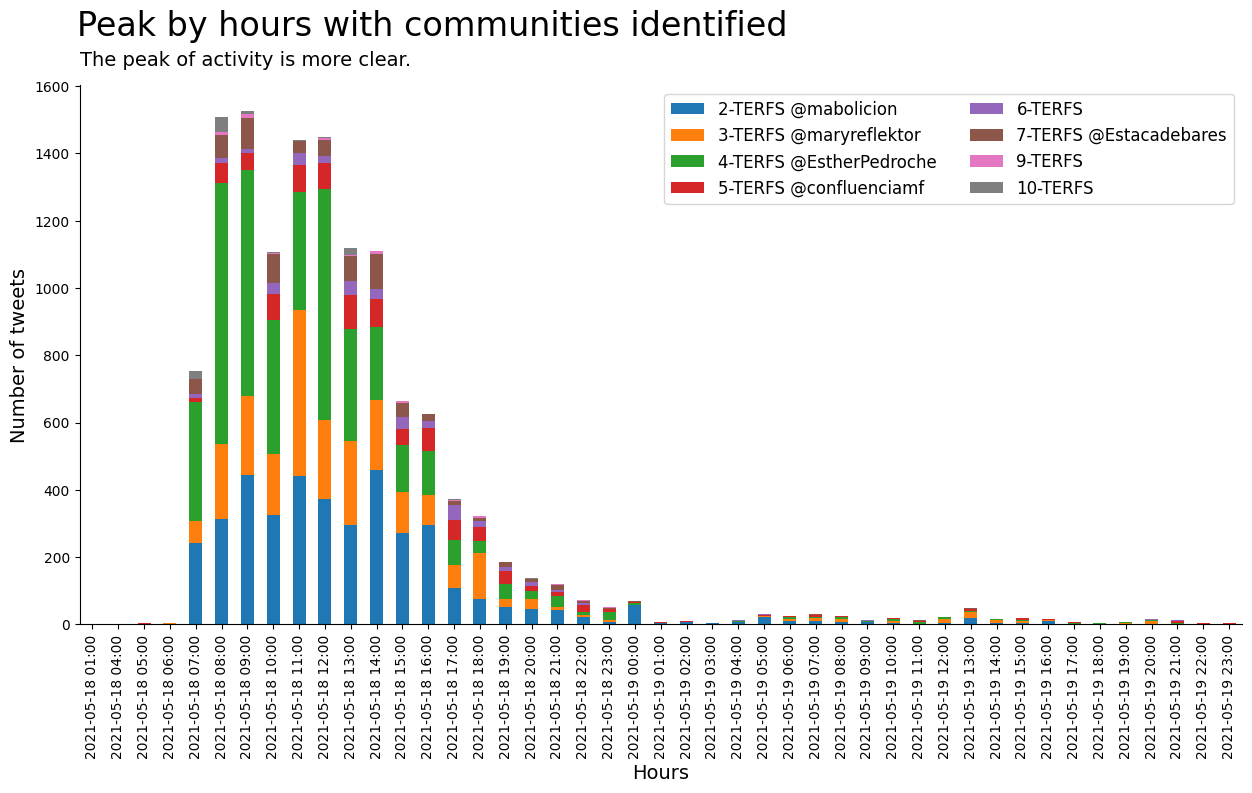

In [10]:
ax = viz_peak_terf.plot.bar(x='time', stacked=True,figsize=(15,7))
ax.spines[['top','right']].set_visible(False)
plt.xticks(rotation=90,ha='center')
plt.legend(loc='upper right', ncol=2, fontsize = 'large')
plt.text(-0.6,1750,'Peak by hours with communities identified',fontsize=24)
plt.text(-0.5,1660,'The peak of activity is more clear.',fontsize=14)
plt.xlabel('Hours', fontsize=14)
plt.tick_params(axis='x',which='both',bottom=True,top=False,labelbottom=True)
plt.ylabel('Number of tweets',fontsize=14)
plt.savefig('2. pico por horas.jpg',bbox_inches='tight',dpi=100)

This time we create the 'date_calc' column keeping the minutes.

In [11]:
ht_minutes = ht
ht_minutes['date_calc'] = ht_minutes['date'].apply(lambda x: dt.datetime.strptime(x,'%Y-%m-%d %H:%M:%S'))
ht_minutes['date_calc'] = ht_minutes['date_calc'].apply(lambda x:x.strftime('%Y-%m-%d %H:%M'))

We create another pivot table the same way as the previous one.

In [12]:
tweets_minutes = pd.pivot_table(ht_minutes,index= "date_calc",columns= "modularity_class",aggfunc= ["count"],values=['id tweet'])
tweets_minutes = tweets_minutes.fillna(0)
tweets_minutes.to_csv('distribucion_por_minutos.csv')

tweets_minutes = pd.read_csv('distribucion_por_minutos.csv')
tweets_minutes.columns = tweets_minutes.iloc[1]
tweets_minutes = tweets_minutes[3:]
tweets_minutes.to_csv('distribucion_por_minutos.csv')

tweets_minutes = pd.read_csv('distribucion_por_minutos.csv')
tweets_minutes = tweets_minutes.drop(['Unnamed: 0'], axis=1)
tweets_minutes.rename(columns={'modularity_class':'minute'}, inplace=True)

We zoom to the first two hours of the peak, on May 18.

In [13]:
start_hashtag = tweets_minutes[(tweets_minutes['minute'] > "2021-05-18 06:30")&(tweets_minutes['minute'] < "2021-05-18 08:15")]

We drop the same communities and name the columns again.

In [14]:
start_hashtag = start_hashtag.drop(['0.0','1.0','8.0'], axis=1)
start_hashtag.columns = ['time','2-TERFS @mabolicion','3-TERFS @maryreflektor','4-TERFS @EstherPedroche',
                     '5-TERFS @confluenciamf','6-TERFS','7-TERFS @Estacadebares','9-TERFS','10-TERFS']

We represent again.

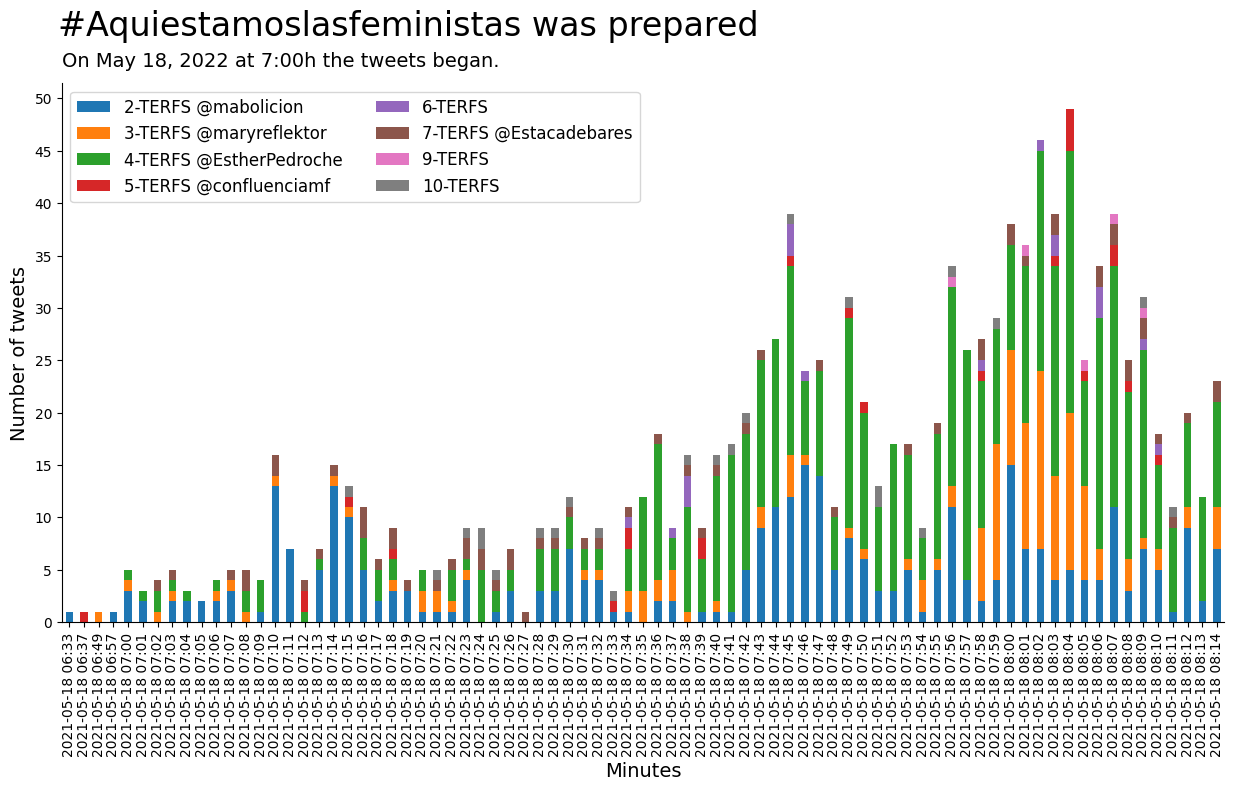

In [15]:
ax = start_hashtag.plot.bar(x='time', stacked=True, figsize=(15,7))
ax.spines[['top','right']].set_visible(False)
plt.xticks(rotation=90)
plt.yticks(np.arange(0,55,5.0))
plt.text(-0.75,56,'#Aquiestamoslasfeministas was prepared',fontsize=24)
plt.text(-0.5,53,'On May 18, 2022 at 7:00h the tweets began.',fontsize=14)
plt.legend(loc='upper left', ncol=2, fontsize = 'large')
plt.xlabel('Minutes',fontsize=14)
plt.ylabel('Number of tweets',fontsize=14)
plt.savefig('3. pico por minutos.jpg',bbox_inches='tight',dpi=100)

###  First 5 tweets

Let's check the first 5 tweets.

In [16]:
first_5_tweets = ht[ht['date'] > '2021-05-18 06:59'].head()
first_5_tweets[['id tweet','date','author','text']]

,id tweet,date,author,text
109,1394548309021319168,2021-05-18 07:00:00,@vanguardiafemi2,"hoy, 18 de mayo, pasará a la historia como el día en que el congreso traicionó a las mujeres. el comienzo de una etapa en la que el feminismo español se queda definitivamente huérfano en el arco parlamentario. @psoe @gpscongreso #leytransespatriarcal #aquiestamoslasfeministas"
110,1394548312666112000,2021-05-18 07:00:01,@mariia842020,el @psoe @gpscongreso verá si se posiciona hoy con las mujeres o con las farmacéuticas que quieren convertir a niños y niñas en pacientes de por vida. #leytransespatriarcal #aquiestamoslasfeministas https://t.co/u5yuukxw5s
111,1394548336447873026,2021-05-18 07:00:07,@ladydiampa,"si negamos el sexo, negamos la opresión de la mujer en base a él. no a la toma en consideración de la ley trans @psoe @gpscongreso #leytransespatriarcal #aquiestamoslasfeministas"
112,1394548371650715650,2021-05-18 07:00:15,@mabolicion,hoy pretenden dar luz verde a una de las leyes trans que amenazan los derechos de las mujeres a razón de sexo. #leytransespatriarcal #aquiestamoslasfeministas para dejar claro que no queremos estas leyes https://t.co/fnomdwklgh vía @_infolibre
113,1394548549728284675,2021-05-18 07:00:58,@veronikautomtk,#leytransespatriarcal #aquiestamoslasfeministas https://t.co/ofuh7vdvon


The hashtag started exactly at 7:00h. Given that in the first minute there were 3 different communities and the first 5 tweets were original we can confirm that the hashtag was prepared. The cause was the following:

### "The Congress is voting on May 18 to take into consideration the Trans Law"
https://www.elsaltodiario.com/ley-trans/el-congreso-votara-el-martes-18-de-mayo-la-toma-en-consideracion-de-la-ley-trans

Once we know the dates of the peak let's filter our dataframe to clean our data.

In [17]:
ht_peak = ht[(ht['date'] > "2021-05-18 00:00")&(ht['date'] < "2021-05-20 00:00")]
print('The peak has',len(ht_peak),'tweets')

The peak has 13150 tweets


Also we must drop the communities that are not TERF.

In [18]:
ht_terf = ht_peak[ht_peak['modularity_class'].isin([2.0,3.0,4.0,5.0,6.0,7.0,9.0,10.0])].reset_index(inplace=False)
ht_terf = ht_terf.drop(['index'], axis=1)

With our data ready we export it to a .txt file, we will use it in the future.

In [19]:
ht_terf.to_csv('aquiestamoslasfeministas_pico.txt',sep='\t',index=False)

### Number of users 

In [20]:
print(len(ht_terf['author']),'users were responsible for the peak.')

13009 users were responsible for the peak.


### To whom do they make political pressure?

A few cells up we saved our peak in a .txt file. Now we process it with t-hoarder to get the mentions and the secondary hashtags.

Let's start with the mentions. We open it as a dataframe and change the name of the columns. Later we will merge some data.

In [21]:
mentions = pd.read_csv('aquiestamoslasfeministas_pico_mentions.txt',sep="\t", on_bad_lines="skip")
mentions.columns = ['user','mentions']
mentions.head(5)

,user,mentions
0,@psoe,2271
1,@gpscongreso,1438
2,@mabolicion,1263
3,@sanchezcastejon,1159
4,@estherpedroche,1082


The Twitter API understand a retweet as a tweet starting with "rt @ ...", so t-hoarder is counting them as mentions too. We must count them in order to substract them from the mentions dataframe.

In [22]:
rts = ht_terf['user retweeted'].value_counts()

We convert it to dataframe.

In [23]:
rts = rts.to_frame().reset_index()
rts.columns = ['user','rts_received']

Merging both dataframes we are sure that each mentions relate to each user properly.

In [24]:
mentions_merged = mentions.merge(rts,how='left',on='user')

In order to substract, we must assign 0s to the NaN values (people without retweets)

In [25]:
mentions_merged['rts_received'] = mentions_merged['rts_received'].fillna(0)

Finally we can substract.

In [26]:
mentions['mentions'] = mentions_merged['mentions'] - mentions_merged['rts_received']

Let's display the top 20 with a horizontal bar graph.

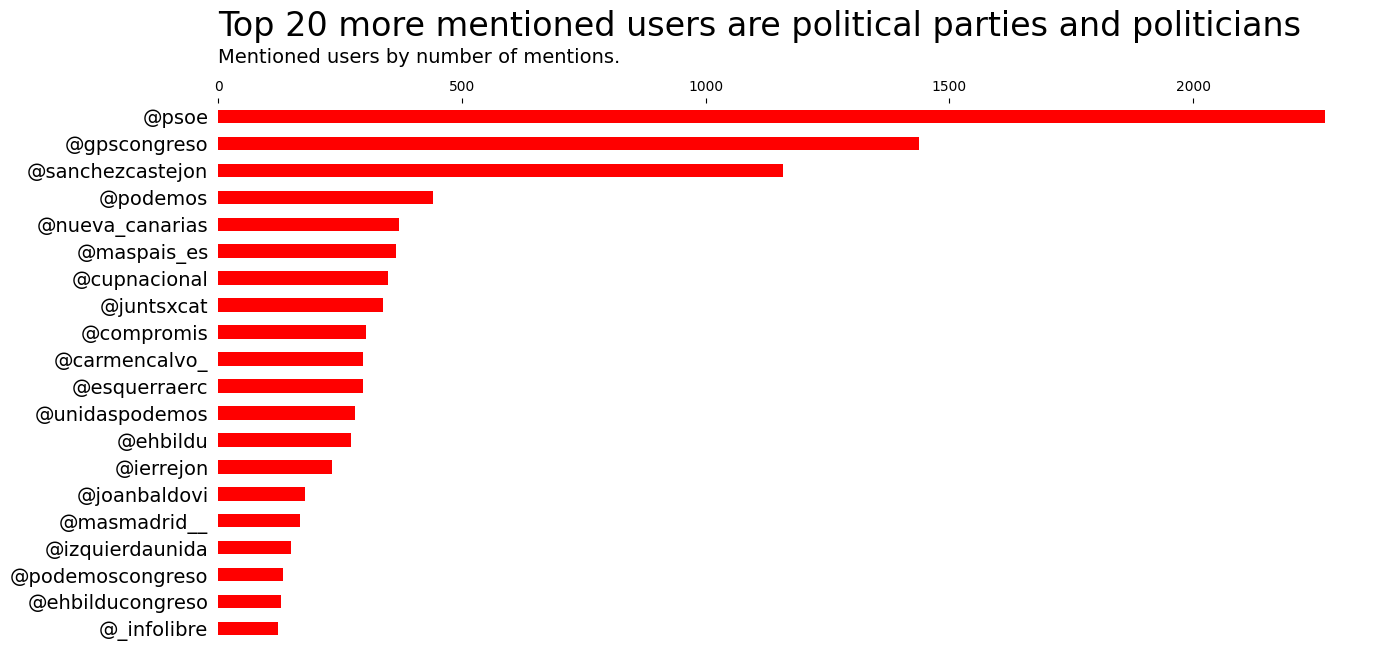

In [27]:
mentions = mentions.sort_values(by='mentions',ascending=True).tail(20)

ax = mentions.plot.barh(x='user',y='mentions',figsize=(15,7),color='red',label='',legend=None,fontsize=14)
ax.spines[['top','bottom','left','right']].set_visible(False)
plt.tick_params(axis='x',which='both',bottom=False,top=True,labelbottom=False,labeltop=True)
plt.tick_params(axis='y',which='both',left=False,right=False)
plt.xlabel('',fontsize=14)
plt.ylabel('')
plt.text(0,22,'Top 20 more mentioned users are political parties and politicians',fontsize=24)
plt.text(0,21,'Mentioned users by number of mentions.',fontsize=14)
plt.savefig('5. menciones.jpg',bbox_inches='tight',dpi=100)

### Secondary Hashtags

As we did before, let's open the hashtags file as dataframe and filter the top 20.

In [28]:
ht_secondary = pd.read_csv('aquiestamoslasfeministas_pico_hashtags.txt',sep="\t", on_bad_lines="skip")
ht_secondary = ht_secondary.drop(0).head(20)

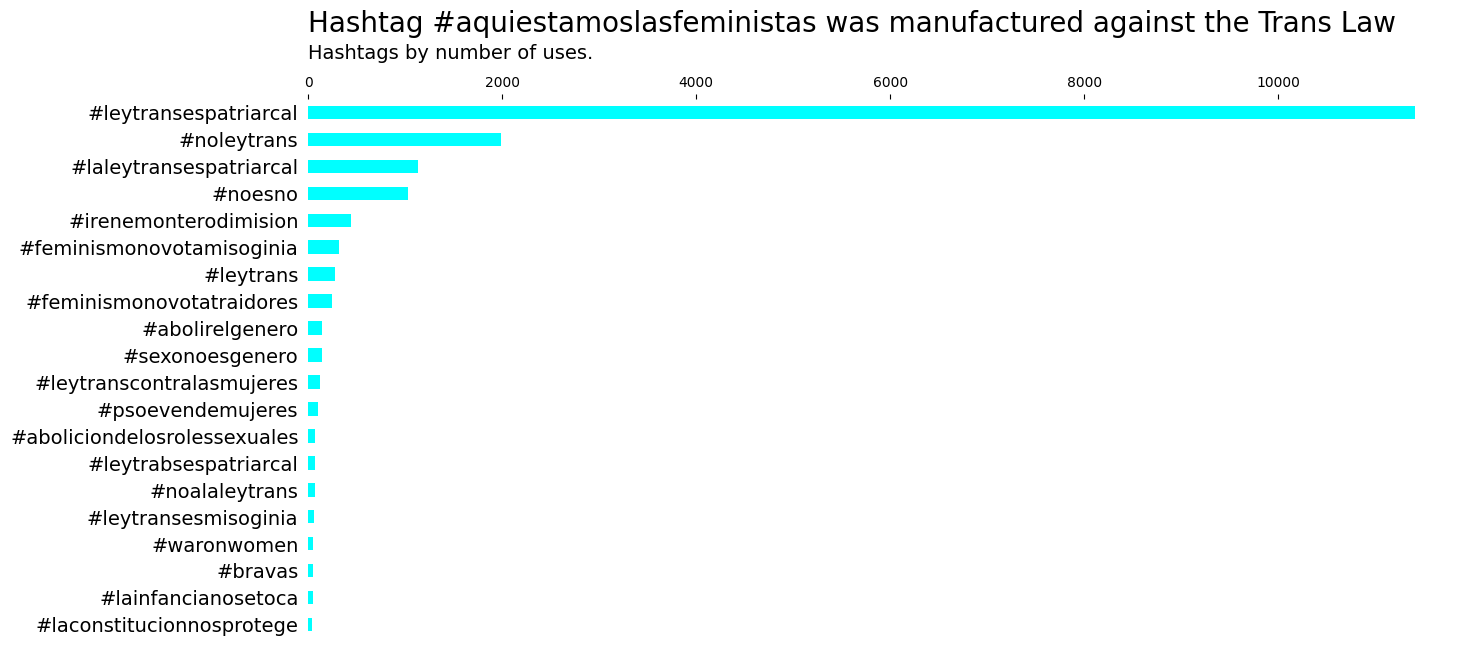

In [29]:
ht_secondary = ht_secondary.sort_values(by='Count',ascending=True)
ax = ht_secondary.plot.barh(x='Hashtag',y='Count',figsize=(15,7),color='cyan',label='',legend=None,fontsize=14)
ax.spines[['top','bottom','left','right']].set_visible(False)
plt.tick_params(axis='x',which='both',bottom=False,top=True,labelbottom=False,labeltop=True)
plt.tick_params(axis='y',which='both',left=False,right=False)
plt.xlabel('',fontsize=14)
plt.ylabel('')
plt.text(0,22,'Hashtag #aquiestamoslasfeministas was manufactured against the Trans Law',fontsize=20)
plt.text(0,21,'Hashtags by number of uses.',fontsize=14)
plt.savefig('5.1 hashtags secundarios.jpg',bbox_inches='tight',dpi=100)

### Most Retweeted Tweets

We count the most retweeted tweets and display them as a dataframe to make them easy to read.

In [30]:
most_rt = ht_terf['text'].value_counts().to_frame().reset_index()
most_rt.columns = ['text','count']
most_rt

,text,count
0,rt @estherpedroche: pido a todos mis seguidores y seguidoras que se unan a la campaña #leytransespatriarcal . #aquiestamoslasfeministas para recordarle a @sanchezcastejon qué #noesno . no al borrado jurídico de las mujeres.,362
1,rt @mabolicion: las leyes trans no regulan derechos para nadie. lo que promueven simplemente es que cualquier hombre pueda ser legalmente mujer solo con decir que lo es. #leytransespatriarcal y #aquiestamoslasfeministas para luchar contra esta ofensa patriarcal https://t.co/bkleyuwpsv,327
2,rt @mabolicion: a ver cuántas de las aliadas del patriarcado que hoy defienden la #leytransespatriarcal dejarán a sus hijas solas en vestuarios en los que accederán hombres solo por declararse mujeres #leytransespatriarcal #aquiestamoslasfeministas defendiendo nuestros espacios https://t.co/i3p32raqnw,159
3,"rt @iria_maranon: hoy se debate en el congreso la ""ley trans"". por la infancia y por las mujeres, revisad los efectos que esta ley ha tenido en otros países y estudiad cómo nos prejudica. confíamos en que la frenéis @psoe #leytransespatriarcal #aquiestamoslasfeministas #abolirelgénero",133
4,"rt @mabolicion: las identidades de género ridiculizan lo que es ser mujer, nuestra biología es secundaria mientras que los estereotipos se convierten en realidades nuestra opresión, su elección #leytransespatriarcal #aquiestamoslasfeministas https://t.co/nik1fx5028",128
...,...,...
3576,no vamos a callar frente al borrado de las mujeres. #leytransespatriarcal #aquiestamoslasfeministas #irenemonterodimision #feminismonovotatraidores,1
3577,¿qué buscan las leyes trans? lo que ha buscado el patriarcado toda la vida. silenciar a las mujeres. ahora más fácilmente haciéndose pasar por nosotras #leytransespatriarcal #aquiestamoslasfeministas https://t.co/jimfo7tpm4,1
3578,¿con qué derecho un grupo de hombres se ponen a definir lo que es ser mujer ? @psoe @unidaspodemos @esquerraerc @maspais_es @cupnacional @juntsxcat @nueva_canarias @compromis #leytransespatriarcal #aquiestamoslasfeministas https://t.co/xiuokkwtdm,1
3579,@sonya_mujer estoy con vosotras 💜 #aquíestamoslasfeministas #laleytransespatriarcal,1


### Users participations

We convert the 'author' column to  a list so we can loop.

In [31]:
author_list = ht_terf['author'].unique().tolist()

Then we have to loop over it to get a list of lists with the author, the total participations, the original tweets, the retweets made and the received.

In [32]:
authors_list_of_lists = []

for author in author_list:
    only_author = ht_terf[ht_terf['author'] == author]
    pattern_rt_author = 'rt '+str(author)
    total_len = len(only_author)
    original_tweets = only_author[~only_author['text'].str.startswith("rt @")]
    original_tweets_len = len(original_tweets)
    rts_made_len = total_len - original_tweets_len
    rts_received = ht_terf[ht_terf['text'].str.startswith(pattern_rt_author)]
    rts_received_len = len(rts_received)
    authors_list_of_lists.append([author,total_len,original_tweets_len,rts_made_len,rts_received_len])

Once finished we convert the list of lists into a dataframe.

In [33]:
volume = pd.DataFrame(authors_list_of_lists,columns=['author','total','original_tweets','rts_made','rts_received'])
volume.head()

,author,total,original_tweets,rts_made,rts_received
0,@palabrademiss9,2,0,2,0
1,@lolafergut,27,1,26,0
2,@madredecabrones,14,2,12,55
3,@acosine2,1,0,1,0
4,@nurialblazquez,8,0,8,0


Let's check the number of users.

In [34]:
authors_unique = len(ht_terf['author'].unique())
authors_unique

1652

### Original tweets

It is highly probable that TERFs copy tweets so they look like originals, let's find out.

First we remove the retweets.

In [35]:
ht_terf_copypaste = ht_terf[~ht_terf['text'].str.startswith("rt @")]

After that we remove the links in the end of the tweets because they make the tweets different, but in the Twitter interface they are the same.

In [36]:
ht_terf_copypaste['text'] = ht_terf_copypaste['text'].apply(lambda x:re.sub(r'http\S+', '', x))

Finally we drop the duplicates, keeping the first tweet as it belong to the real author.

In [37]:
ht_terf_copypaste = ht_terf_copypaste.drop_duplicates(subset='text',keep='first')

Now we can count how many times does every user appear, which is equivalent to the number of original tweets.

In [38]:
true_original_tweets = ht_terf_copypaste['author'].value_counts()
true_original_tweets = true_original_tweets.to_frame().reset_index()
true_original_tweets.columns = ['author','true_original_tweets']

We merge it with the volume dataframe

In [39]:
volume = volume.merge(true_original_tweets,how='left',on='author')
volume['true_original_tweets'] = volume['true_original_tweets'].fillna(0)
volume['true_original_tweets'] = volume['true_original_tweets'].apply(lambda x:int(x))
volume = volume[['author','total','original_tweets','true_original_tweets','rts_made','rts_received']]


We count the fake and the true original tweets and substract them.

In [40]:
fake_original_count = volume['original_tweets'].sum()
true_original_count = volume['true_original_tweets'].sum()
print(fake_original_count,'-',true_original_count)

2025 - 1740


In [41]:
copied_tweets = volume['original_tweets'].sum() - volume['true_original_tweets'].sum()
print(copied_tweets,'tweets were copied.')

285 tweets were copied.


### Graph representations

In this part we are going to count the original tweets, the total participations and the retweets made and received of the top 20 of each measurement. Also we will find what percentage does it mean regarding the total. Finally we are are going to calculate the mean of all users.
Once we have it all we are going to represent them in four graphs.

In [42]:
true_original_top20 = volume.sort_values(by='true_original_tweets',ascending=False).head(20)
true_original_top20.head(5)

,author,total,original_tweets,true_original_tweets,rts_made,rts_received
46,@maryreflektor,105,102,100,3,319
20,@estacadebares,135,92,91,43,332
19,@tesonfeminista,70,66,65,4,108
28,@abolicionbadaj,101,54,50,47,278
114,@hello_aza,130,62,45,68,84


In [43]:
true_original_top20_count = true_original_top20['true_original_tweets'].sum()
true_original_top20_count

757

In [44]:
true_original_top20_percentage = (true_original_top20_count/volume['true_original_tweets'].sum()*100).round(1)
true_original_top20_percentage

43.5

In [45]:
true_original_mean = round((true_original_count/authors_unique),1)
true_original_mean

1.1

In [46]:
true_original_top20 = volume.sort_values(by=['true_original_tweets'],ascending=False).head(20)

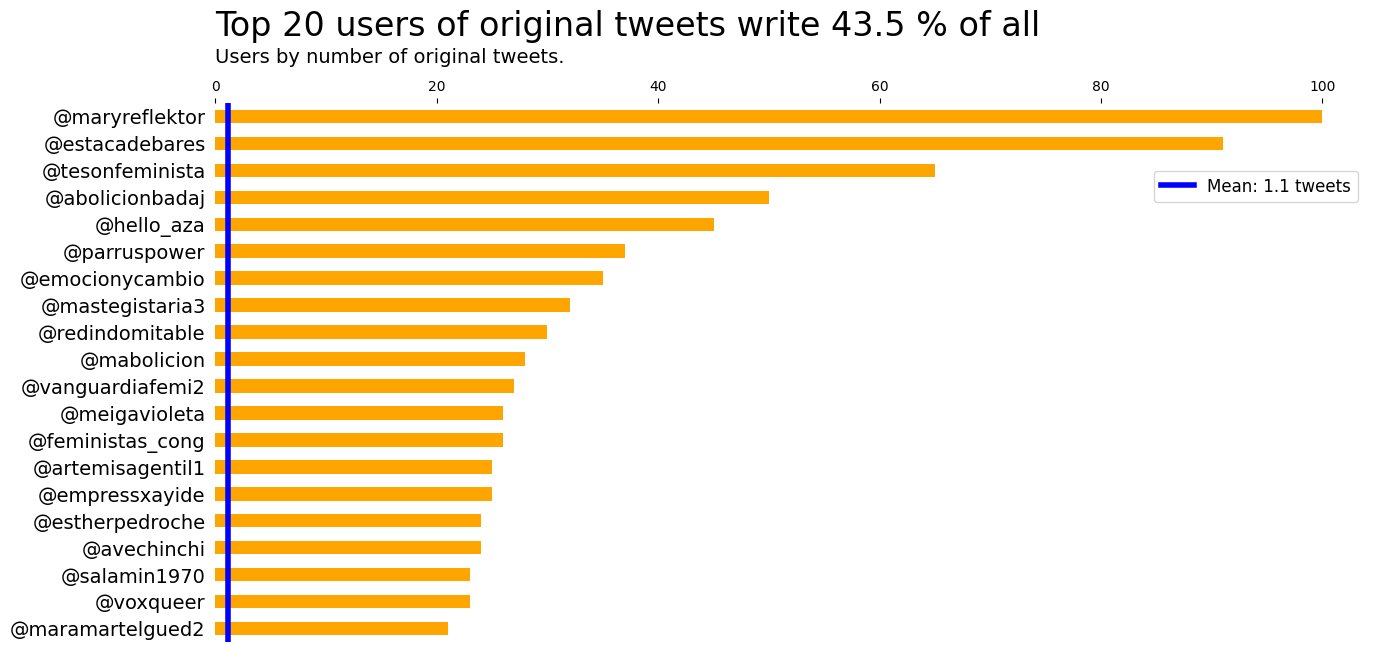

In [47]:
true_original_top20_sorted = volume.sort_values(by=['true_original_tweets'],ascending=True).tail(20)

ax = true_original_top20_sorted.plot.barh(x='author',y='true_original_tweets',figsize=(15,7),color='orange',label='',fontsize=14)
ax.spines[['top','bottom','left','right']].set_visible(False)
plt.tick_params(axis='x',which='both',bottom=False,top=True,labelbottom=False,labeltop=True)
plt.tick_params(axis='y',which='both',left=False,right=False)
plt.xlabel('',fontsize=14)
plt.ylabel('')
plt.text(0,22,'Top 20 users of original tweets write {} % of all'.format(true_original_top20_percentage),
         fontsize=24)
plt.text(0,21,'Users by number of original tweets.',fontsize=14)
plt.axvline(x=true_original_mean,color='blue',linewidth=4,label='Mean: {} tweets'.format(true_original_mean))
plt.legend(bbox_to_anchor=(0.99,0.89),prop={'size': 12})
plt.savefig('6.1. originales.jpg',bbox_inches='tight',dpi=100)

### Participations (tweets + retweets)

In [48]:
participations_top20 = volume.sort_values(by=['total'],ascending=False).head(20)
participations_top20.head()

,author,total,original_tweets,true_original_tweets,rts_made,rts_received
164,@maramartelgued2,421,22,21,399,44
43,@brujitarad,292,29,17,263,112
17,@rayashla,235,13,13,222,181
402,@esatesunaprueb1,204,0,0,204,0
485,@maioraane,173,1,1,172,13


In [49]:
# INT TEMPORAL
top20_participations_percentage = int((participations_top20['total'].sum()/volume['total'].sum()*100).round(1))
top20_participations_percentage

25

In [50]:
mean_participations = round(volume['total'].mean(),1)
mean_participations 

7.9

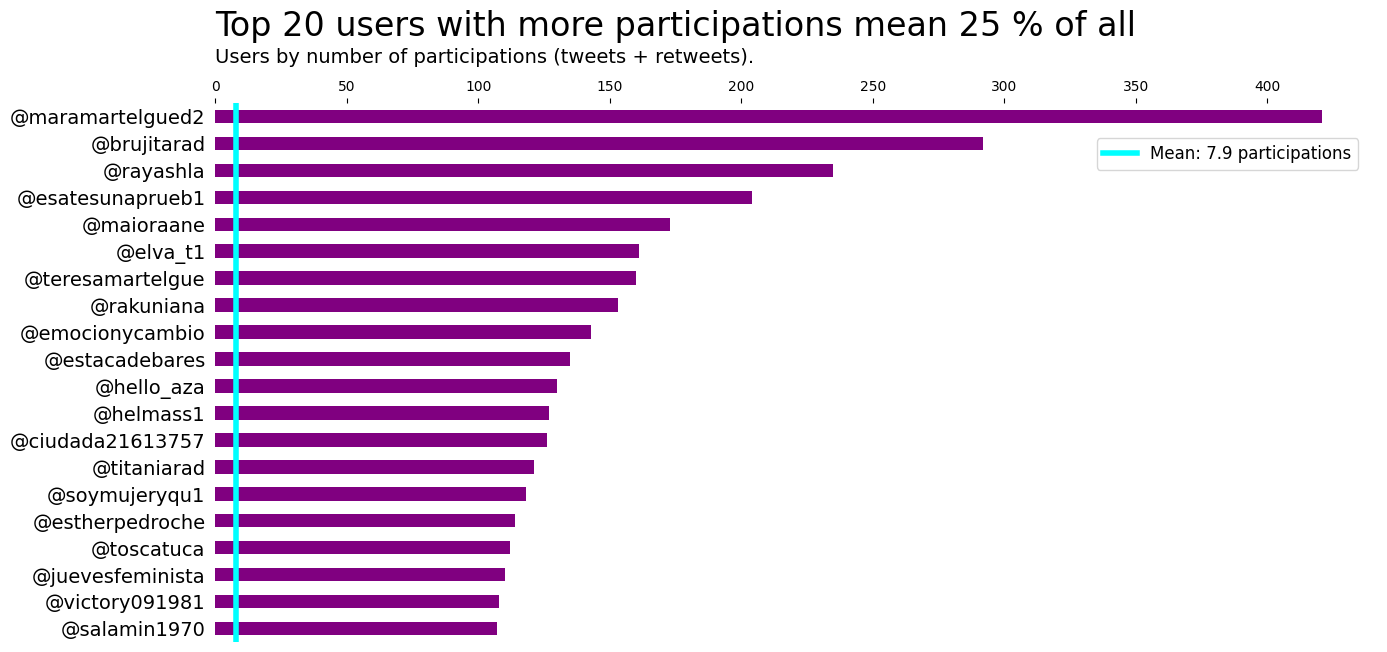

In [51]:
top20_participations_sorted = volume.sort_values(by=['total'],ascending=True).tail(20)

ax = top20_participations_sorted.plot.barh(x='author',y='total',figsize=(15,7),color='purple',label='',fontsize=14)
ax.spines[['top','bottom','left','right']].set_visible(False)
plt.tick_params(axis='x',which='both',bottom=False,top=True,labelbottom=False,labeltop=True)
plt.tick_params(axis='y',which='both',left=False,right=False)
plt.xlabel('',fontsize=14)
plt.ylabel('')
plt.text(0,22,'Top 20 users with more participations mean {} % of all'.format(top20_participations_percentage),
         fontsize=24)
plt.text(0,21,'Users by number of participations (tweets + retweets).',fontsize=14)
plt.axvline(x=mean_participations,color='cyan',linewidth=4,label='Mean: {} participations'.format(mean_participations))
plt.legend(bbox_to_anchor=(0.99,0.95),prop={'size': 12})
plt.savefig('6.2 participations.jpg',bbox_inches='tight',dpi=100)

### Influence (measured with the retweets received) 

In [52]:
top20_influence = volume.sort_values(by=['rts_received'],ascending=False).head(20)
top20_influence.head()

,author,total,original_tweets,true_original_tweets,rts_made,rts_received
13,@mabolicion,41,28,28,13,1245
86,@estherpedroche,114,31,24,83,969
10,@vanguardiafemi2,35,27,27,8,527
20,@estacadebares,135,92,91,43,332
46,@maryreflektor,105,102,100,3,319


In [53]:
top20_influence_percentage = (top20_influence['rts_received'].sum()/volume['rts_received'].sum()*100).round(1)
top20_influence_percentage

55.5

In [54]:
mean_rts_received = round(volume['rts_received'].mean(),1)
mean_rts_received

6.6

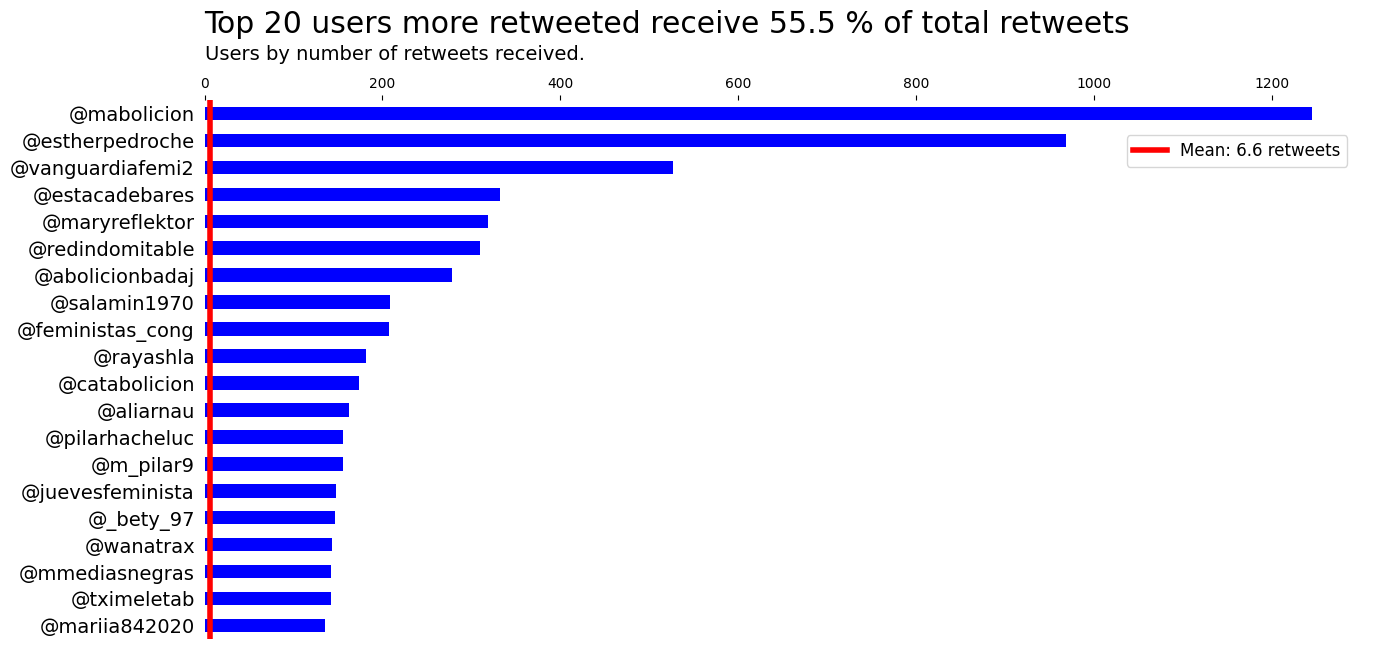

In [55]:
top20_influence_sorted = volume.sort_values(by=['rts_received'],ascending=True).tail(20)

ax = top20_influence_sorted.plot.barh(x='author',y='rts_received',figsize=(15,7),color='blue',label='',fontsize=14)

ax.spines[['top','bottom','left','right']].set_visible(False)
plt.tick_params(axis='x',which='both',bottom=False,top=True,labelbottom=False,labeltop=True)
plt.tick_params(axis='y',which='both',left=False,right=False)
plt.xlabel('',fontsize=14)
plt.ylabel('')
plt.text(0,22,'Top 20 users more retweeted receive {} % of total retweets'.format(top20_influence_percentage),
         fontsize=21.5)
plt.text(0,21, 'Users by number of retweets received.',fontsize=14)
plt.axvline(x=mean_rts_received,color='red',linewidth=4,label='Mean: {} retweets'.format(mean_rts_received))
plt.legend(bbox_to_anchor=(0.99,0.95),prop={'size': 12})
plt.savefig('6.3 retweeteados.jpg',bbox_inches='tight',dpi=100)

### Retweets made

In [56]:
top20_retweets_made = volume.sort_values(by=['rts_made'],ascending=False).head(20)
top20_retweets_made.head()

,author,total,original_tweets,true_original_tweets,rts_made,rts_received
164,@maramartelgued2,421,22,21,399,44
43,@brujitarad,292,29,17,263,112
17,@rayashla,235,13,13,222,181
402,@esatesunaprueb1,204,0,0,204,0
485,@maioraane,173,1,1,172,13


In [57]:
top20_rts_made_percentage = (top20_retweets_made['rts_made'].sum()/volume['rts_made'].sum()*100).round(1)
top20_rts_made_percentage

27.3

In [58]:
mean_rts_made = round(volume['rts_made'].mean(),1)
mean_rts_made

6.6

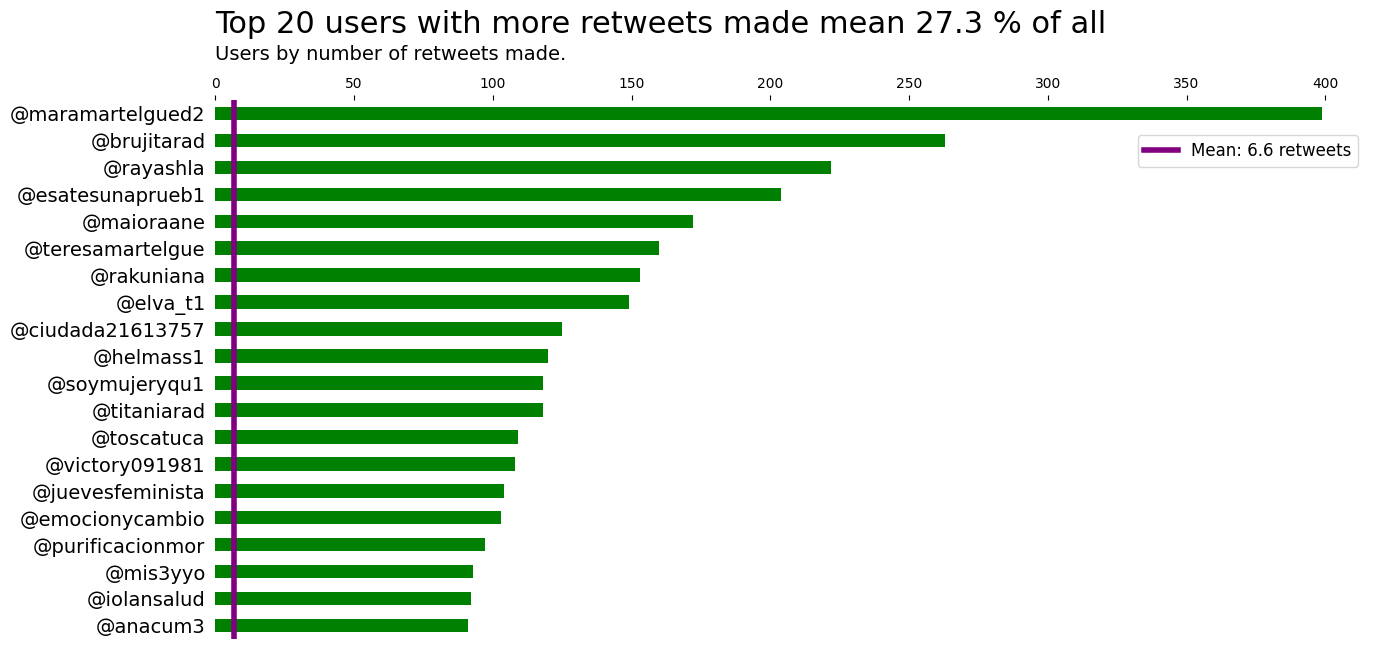

In [59]:
top20_rts_made_sorted = volume.sort_values(by=['rts_made'],ascending=True).tail(20)

ax = top20_rts_made_sorted.plot.barh(x='author',y='rts_made',figsize=(15,7),color='green',label='',fontsize=14)
ax.spines[['top','bottom','left','right']].set_visible(False)
plt.tick_params(axis='x',which='both',bottom=False,top=True,labelbottom=False,labeltop=True)
plt.tick_params(axis='y',which='both',left=False,right=False)
plt.xlabel('',fontsize=14)
plt.ylabel('')
plt.text(0,22,'Top 20 users with more retweets made mean {} % of all'.format(top20_rts_made_percentage),
         fontsize=22)
plt.text(0,21,'Users by number of retweets made.',fontsize=14)
plt.axvline(x=mean_rts_received,color='purple',linewidth=4,label='Mean: {} retweets'.format(mean_rts_made))
plt.legend(bbox_to_anchor=(0.99,0.95),prop={'size': 12})
plt.savefig('6.4 rts hechos.jpg',bbox_inches='tight',dpi=100)

Let's representate the four measurements with pie charts.

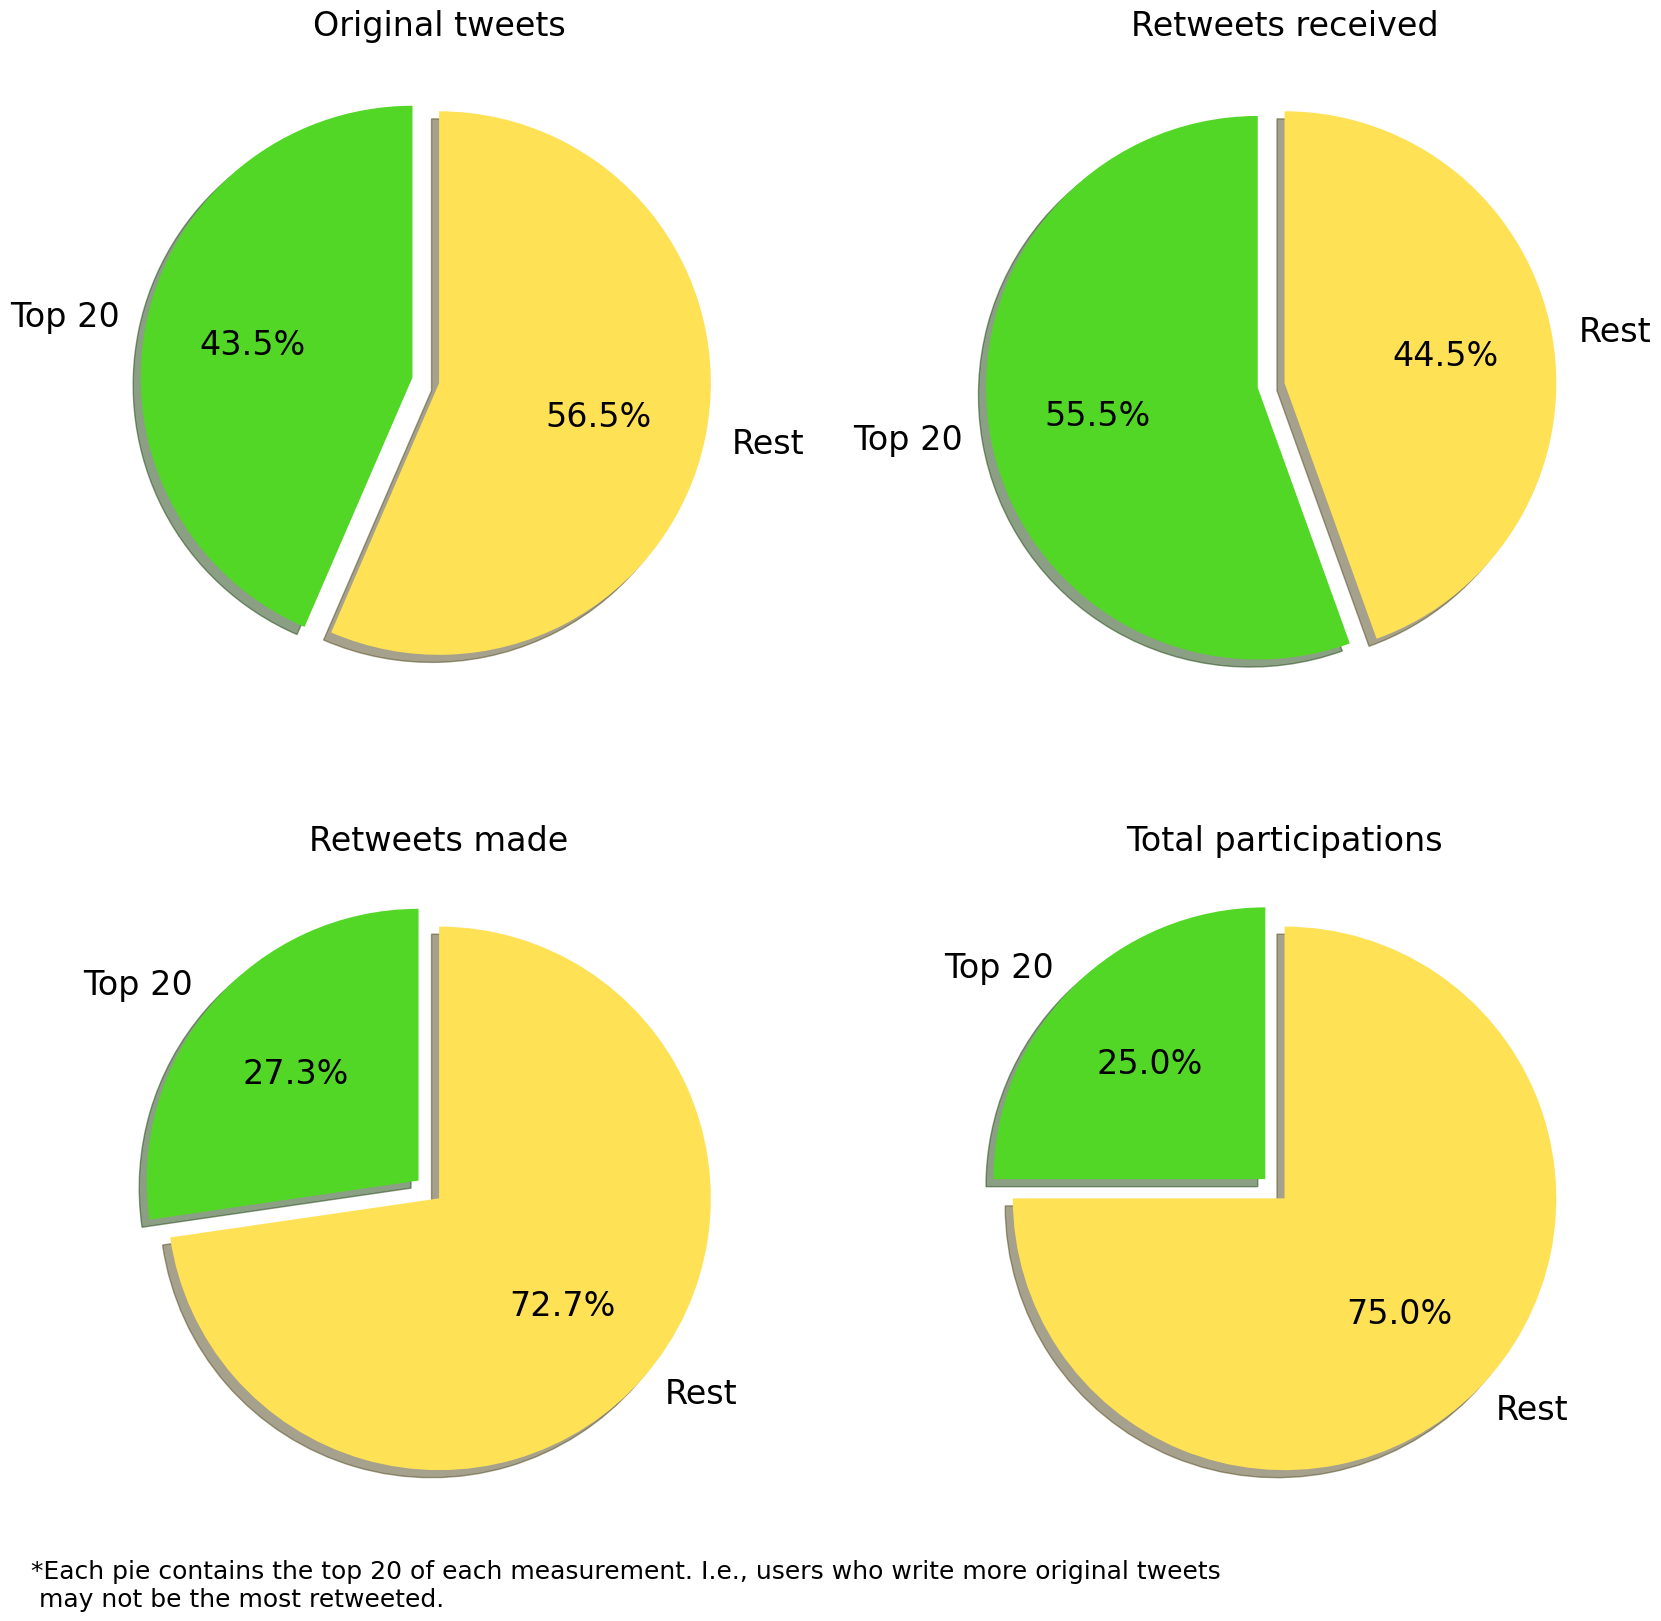

In [60]:
plt.figure(figsize=(20,30))
explode = (0.1, 0)
plt.subplot(3,2,1)
plt.pie([true_original_top20_percentage, 100-true_original_top20_percentage], explode=explode,
        labels=('Top 20', 'Rest'), autopct='%1.1f%%', shadow=True, startangle=90, textprops={'fontsize': 24,'color':"black"},
       colors = ['#52D726', '#FFE156'])
plt.title('Original tweets',fontsize=24)
plt.text(-1.5,-4.5,'*Each pie contains the top 20 of each measurement. I.e., users who write more original tweets\n may not be the most retweeted.',
         fontsize=18)

plt.subplot(3, 2, 2)
plt.pie([top20_influence_percentage, 100-top20_influence_percentage], explode=explode,
        labels=('Top 20', 'Rest'), autopct='%1.1f%%', shadow=True, startangle=90, textprops={'fontsize': 24,'color':"black"},
       colors = ['#52D726', '#FFE156'])
plt.title('Retweets received',fontsize=24)

plt.subplot(3, 2, 3)
plt.pie([top20_rts_made_percentage, 100-top20_rts_made_percentage], explode=explode,
        labels=('Top 20', 'Rest'), autopct='%1.1f%%', shadow=True, startangle=90, textprops={'fontsize': 24,'color':"black"},
       colors = ['#52D726', '#FFE156'])
plt.title('Retweets made',fontsize=24)

plt.subplot(3, 2, 4)
plt.pie([top20_participations_percentage, 100-top20_participations_percentage], explode=explode,
        labels=('Top 20', 'Rest'), autopct='%1.1f%%', shadow=True, startangle=90, textprops={'fontsize': 24,'color':"black"},
       colors = ['#52D726', '#FFE156'])
plt.title('Total participations',fontsize=24)

plt.savefig('6.5 todos juntos.jpg',bbox_inches='tight',dpi=100)

### Invented effort measurement

In regard of the tweets and the retweets number, we can develop a measurement of the effort that takes to write an original tweet. This is different for each hashtag, because it is more difficult to write in a political hashtag than in #felizmartes (happy tuesday), which is a hashtag were everyone could say something and that would be fine.

The effort variable is the number of retweets divide by the number of original tweets.

In [61]:
effort_variable = volume['rts_made'].sum()/volume['true_original_tweets'].sum()
effort_variable
effort_variable_rounded = effort_variable.round(1)
effort_variable_rounded

6.3

In [62]:
print('There are {} retweets for each original tweet.'.format(effort_variable_rounded))

There are 6.3 retweets for each original tweet.


Let's take the top 20 users with more participations and calculate their effort to check if they make more original tweets or retweets.

In [63]:
volume['effort'] = volume['true_original_tweets']*effort_variable - volume['rts_made']
volume_top_20 = volume.sort_values(by=['total'], ascending=False).head(20)

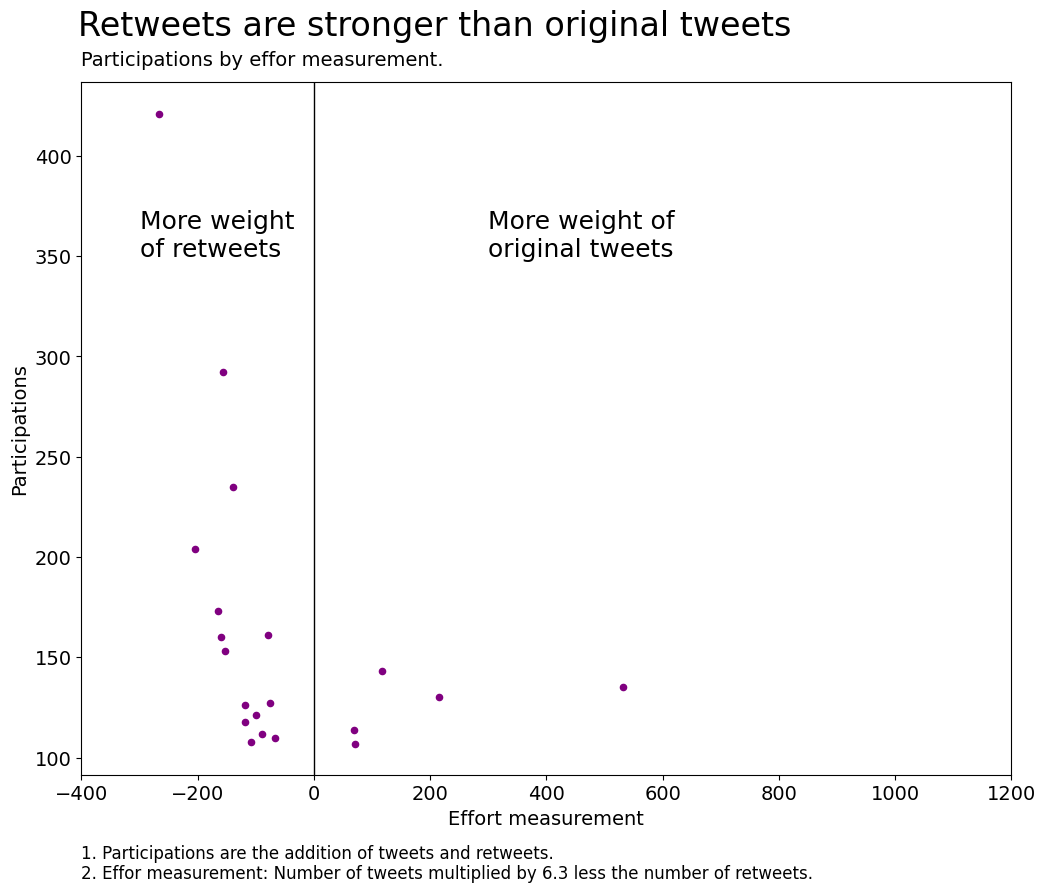

In [64]:
ax = volume_top_20.plot.scatter(x='effort',y='total',figsize=(12,9),fontsize=14,color='purple')
plt.xlabel('Effort measurement',fontsize=14)
plt.ylabel('Participations',fontsize=14)
plt.text(-405,460,'Retweets are stronger than original tweets',fontsize=24)
plt.text(-400,445,'Participations by effor measurement.',fontsize=14)
plt.text(-400,50,'1. Participations are the addition of tweets and retweets.',fontsize=12)
plt.text(-400,40,'2. Effor measurement: Number of tweets multiplied by {} less the number of retweets.'.format(effort_variable_rounded),
         fontsize=12)
plt.axvline(x=0,color='black',linewidth=1)
plt.xlim(-400,1200)
plt.text(-300,350,'More weight\nof retweets',fontsize=18)
plt.text(300,350,'More weight of\noriginal tweets',fontsize=18)
plt.savefig('8. medida de esfuerzo.jpg',bbox_inches='tight',dpi=100)

### Percentage of original tweets versus percentage of retweets

In [65]:
original_percentage = (volume['true_original_tweets'].sum()/volume['total'].sum()*100).round(1)
rt_percentage = ((volume['rts_made'].sum()+copied_tweets)/volume['total'].sum()*100).round(1)
print(original_percentage,rt_percentage)

13.4 86.6


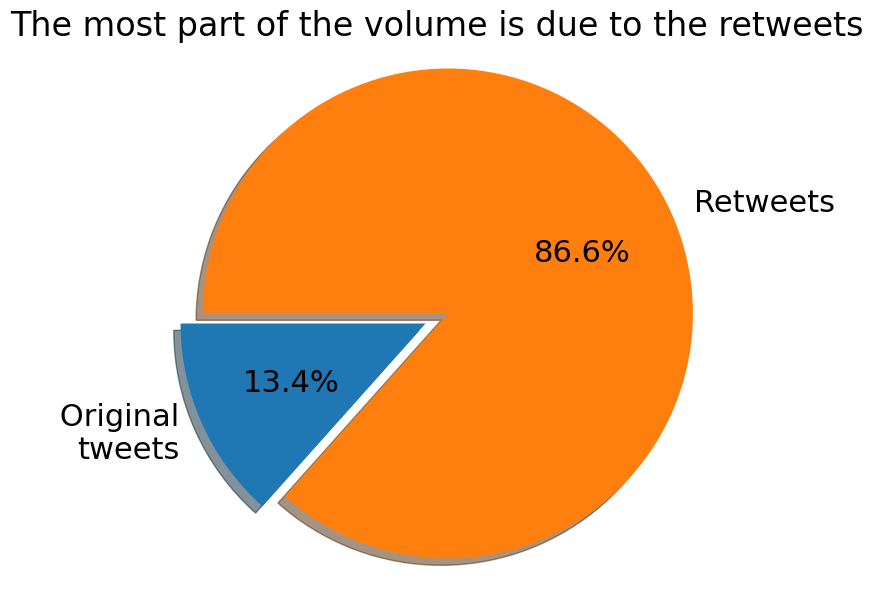

In [66]:
labels = ' Original\ntweets', 'Retweets'
sizes = [original_percentage, rt_percentage]
explode = (0.1, 0)
fig1, ax1 = plt.subplots(figsize=(7,7))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=180, textprops={'fontsize': 22})
ax1.axis('equal')
plt.title('The most part of the volume is due to the retweets',fontsize=24)
plt.savefig('9.percentage de tweets y retweets.jpg',bbox_inches='tight',dpi=100)

## Hate discourse

We are going to test if some words usually used against trans people (specially trans women) appear in the hashtag.

In [67]:
hate_list = ['pedofil','pederast','los trans','travesti','cuidapijas','enfermedad','cromosomas','viola','depreda','homofobo',
              'homofoba']

In [68]:
ht_terf_hate = ht_terf[ht_terf['text'].str.contains('|'.join(hate_list))]
ht_terf_hate = ht_terf_hate[['id tweet','author','text']]
ht_terf_hate = ht_terf_hate.drop_duplicates(subset='text',keep='first')
ht_terf_hate = ht_terf_hate[~ht_terf_hate['text'].str.startswith('rt @')]
print('There are',len(ht_terf_hate),'original tweets with hate toward trans people according to our hate list.')
ht_terf_hate.head()

There are 30 original tweets with hate toward trans people according to our hate list.


,id tweet,author,text
596,1394561560710979586,@lauchagua,un hondureño se cambia de sexo para evadir a la justicia por la violación de un niño #leytransespatriarcal #aquiestamoslasfeministas cc @psoe @gpscongreso https://t.co/rxkz8lmvax
624,1394562041474699266,@lauchagua,un transexual cumplirá pena en el módulo de reclusas pese a estar condenado por violar a una mujer #leytransespatriarcal #aquiestamoslasfeministas cc @psoe @gpscongreso https://t.co/uc9oqtx9yl
1007,1394565005945753602,@lauchagua,porque al final los violadores son xy y las violadas xx. #leytransespatriarcal #aquiestamoslasfeministas cc @psoe @gpscongreso https://t.co/ll84fo4qkz
1137,1394566105851731969,@estacadebares,hay pedofilia en la ideología queer. #noleytrans #laleytransespatriarcal #aquiestamoslasfeministas @gpscongreso @psoe @podemos https://t.co/f7tvhdnmse
1297,1394568281684598784,@estacadebares,hay pedofilia en lo queer. #noleytrans #leytransespatriarcal #aquiestamoslasfeministas @gpscongreso @psoe @podemos https://t.co/yrkfhbbvpz


###  Conclusions

We have demonstrate several hipothesis about #aquiestamoslasfeministas:  
&emsp;- It was not spontaneous, but prepared.  
&emsp;- It had a clear political intention.  
&emsp;- They tried to abuse the Twitter algorithm through bot alike behaviour: high volume spamming retweets and copying tweets.  
&emsp;- Although apparently was against a law, it contains a lot of hate towards the trans community.